Capstone Project: Statistical Analysis of Patient Health Data
Project Overview:
Participants will conduct a comprehensive statistical analysis of patient health data, focusing on inferential statistics, descriptive statistics, and exploratory data analysis (EDA). The goal is to uncover meaningful patterns, trends, and insights that can contribute to better understanding factors related to diabetes.
Project Tasks:
1. Data Understanding & Cleaning
Load the dataset and examine its structure.
Identify missing or inconsistent data and suggest appropriate handling techniques.
Analyze the distribution of each variable using summary statistics.
Discuss potential data transformations (e.g., normalization, scaling).
2. Descriptive Statistics
Compute central tendency measures (mean, median, mode) for all numerical variables.
Calculate dispersion metrics (variance, standard deviation, interquartile range).
Create frequency distributions for categorical variables.
Identify outliers using boxplots and discuss their potential impact.
3. Exploratory Data Analysis (EDA)
Generate visualizations (histograms, scatter plots, heatmaps) to explore data distribution and correlations.
Examine relationships between features such as BMI vs. PlasmaGlucose, Age vs. Diabetes Pedigree, etc.
Analyze the correlation matrix to determine the strength of relationships between variables.
Perform segmentation analysis by dividing patients into age groups and evaluating diabetes risk.
4. Inferential Statistics
Conduct hypothesis testing:
Compare the mean BMI of diabetic vs. non-diabetic patients (t-test).
Assess the relationship between Pregnancies and Diabetes using a chi-square test.
Perform an ANOVA test to compare PlasmaGlucose levels across different age groups.
Interpret p-values and confidence intervals to draw meaningful conclusions.
5. Predictive Insights & Report Writing
Discuss which variables appear to be the most influential in determining diabetes status.
Summarize findings in a structured report, including key observations from descriptive, inferential, and exploratory analyses.
Provide actionable recommendations based on statistical insights.
Submission Requirements:
A structured report (PDF or Word) detailing the analysis, findings, and interpretations.
Visualizations and tables to support key insights.
Clearly stated conclusions and recommendations.
This project will help you all to apply statistical techniques to real-world health data, enhancing their analytical and decision-making skills.

In [1]:
#helps import a library for handling numbers or data
import numpy as np

#performs tabular analysis on those numbers
import pandas as pd

#perform statistical analysiss
import scipy.stats as stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sb

#for statistical analysis
import statsmodels.api as sm

In [40]:
df_demo = pd.read_csv('C:\\Users\\sajag177350\\Python For Statistics\\diabetes.csv',delimiter=',',header='infer')
df_demo.head()
df = df_demo.drop('PatientID',axis = 'columns')
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [41]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [42]:
df.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

1. OBSERVATIONS:
    - ID REMOVED since it is not required
    - Data is numerical
    - Missing value handling:
          - No Null values found

    - Since Measures of central tendencies are different, we may need to normalize the data
   

In [28]:
df_normalized

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000,0.0
1,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714,0.0
2,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714,0.0
3,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857,1.0
4,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857,0.0
...,...,...,...,...,...,...,...,...,...
14995,0.714286,0.141892,0.387097,0.453488,0.207643,0.404713,0.031608,0.357143,1.0
14996,0.142857,0.195946,0.451613,0.232558,0.196178,0.315380,0.352683,0.303571,1.0
14997,0.000000,0.331081,0.698925,0.418605,0.054777,0.012956,0.156959,0.053571,0.0
14998,0.000000,0.594595,0.795699,0.127907,0.187261,0.042056,0.100836,0.035714,0.0


Diabetic
0    10000
1     5000
dtype: int64


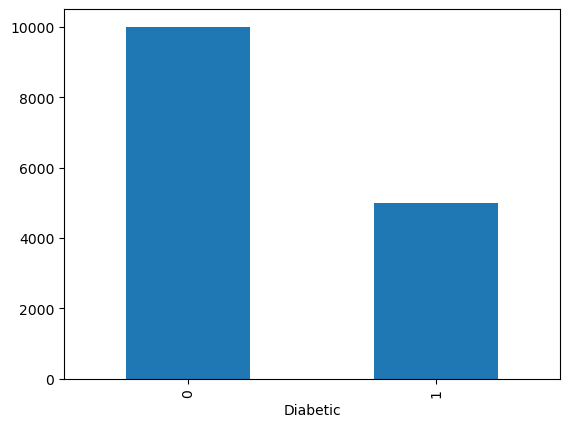

In [51]:
GroupedData=df.groupby(by='Diabetic').size()
print(GroupedData)
 
# Generating a bar chart for a single column
%matplotlib inline
GroupedData.plot.bar()
plt.show()

Pregnancies
0     4377
1     2864
2      939
3     1219
4      675
5      687
6     1070
7      895
8      645
9      881
10     450
11     143
12      57
13      69
14      29
dtype: int64


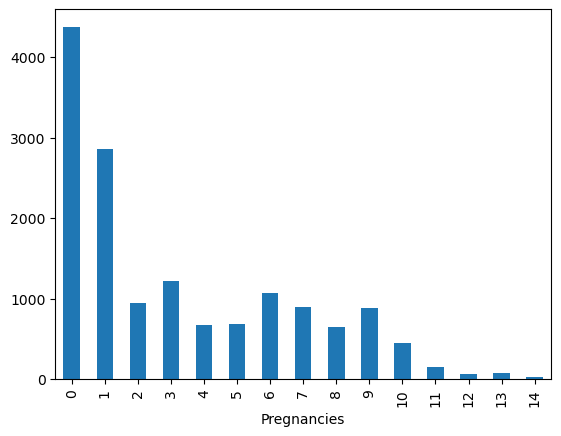

In [53]:
GroupedData=df.groupby(by='Pregnancies').size()
print(GroupedData)
 
# Generating a bar chart for a single column
%matplotlib inline
GroupedData.plot.bar()
plt.show()

Minimum:0.00
Mean:0.23
Median:0.14
Mode:0.00
Maximum:1.00



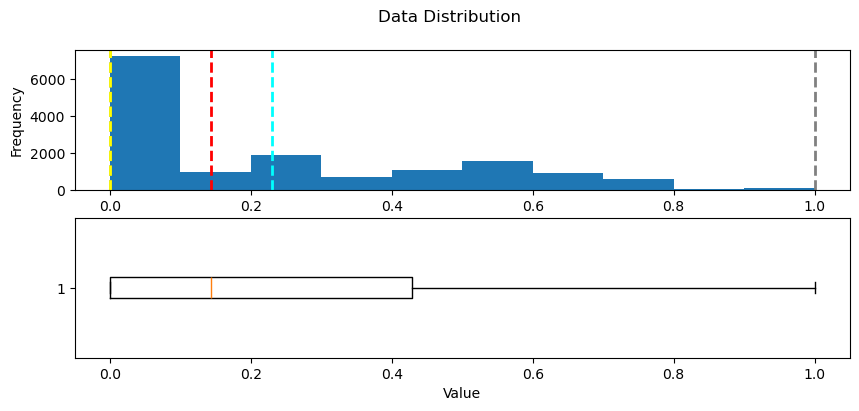

In [56]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()

# Get the variable to examine
col = df_normalized['Pregnancies']
# Call the function
show_distribution(col)

Minimum:0.07
Mean:0.33
Median:0.29
Mode:0.07
Maximum:1.00



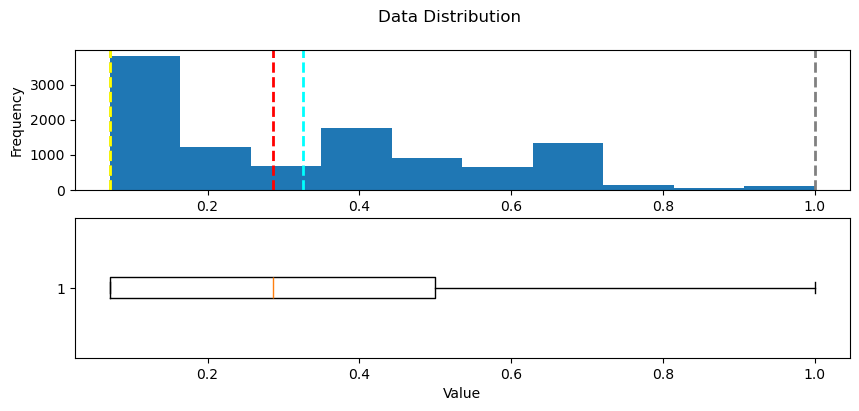

In [59]:
#remove 1 % quantile -- find outliers -- increase percentage -- remove outliers ... etc 
q01 = df_normalized.Pregnancies.quantile(0.01)
# Get the variable to examine
col = df_normalized[df_normalized.Pregnancies>q01]['Pregnancies']
# Call the function
show_distribution(col)

In [ ]:
#creates a figure
plt.figure(figsize=(7,4))
#prepares a histogram
#KDE - KERNEL DISTRIBUTION ESTIMATE - GIVES THE SMOOTHENED DISTRIBUTION OF DATA
sb.histplot(df["Salary"],kde=True,bins=5)
#gives the x and ylabels
plt.xlabel("Salary")
plt.ylabel("Frequency")
#shows only the graph
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df.copy()

# Normalize the numeric columns
df_normalized[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','Diabetic']] = scaler.fit_transform(df_normalized[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','Diabetic']])
df_normalized

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000,0.0
1,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714,0.0
2,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714,0.0
3,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857,1.0
4,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857,0.0
...,...,...,...,...,...,...,...,...,...
14995,0.714286,0.141892,0.387097,0.453488,0.207643,0.404713,0.031608,0.357143,1.0
14996,0.142857,0.195946,0.451613,0.232558,0.196178,0.315380,0.352683,0.303571,1.0
14997,0.000000,0.331081,0.698925,0.418605,0.054777,0.012956,0.156959,0.053571,0.0
14998,0.000000,0.594595,0.795699,0.127907,0.187261,0.042056,0.100836,0.035714,0.0


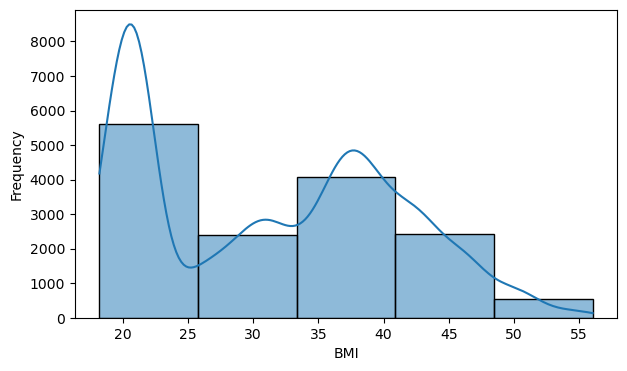

In [61]:
#creates a figure
plt.figure(figsize=(7,4))
#prepares a histogram
#KDE - KERNEL DISTRIBUTION ESTIMATE - GIVES THE SMOOTHENED DISTRIBUTION OF DATA
sb.histplot(df["BMI"],kde=True,bins=5)
#gives the x and ylabels
plt.xlabel("BMI")
plt.ylabel("Frequency")
#shows only the graph
plt.show()

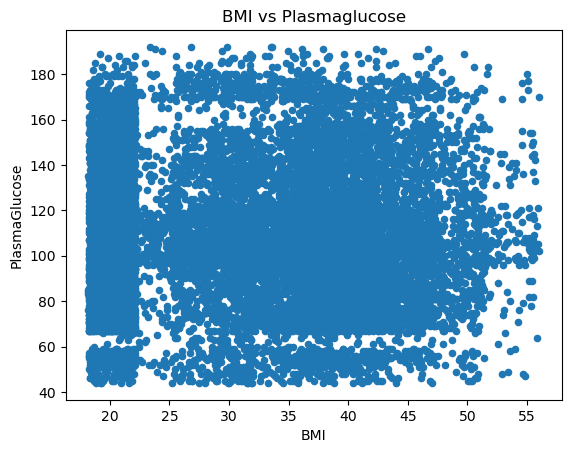

In [64]:
# Create a scatter plot
df.plot.scatter(title='BMI vs Plasmaglucose', x='BMI', y='PlasmaGlucose')
plt.show()

                        Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Pregnancies                1.000000       0.054502                0.043528   
PlasmaGlucose              0.054502       1.000000                0.007212   
DiastolicBloodPressure     0.043528       0.007212                1.000000   
TricepsThickness           0.063605       0.027100                0.011106   
SerumInsulin               0.104487       0.033545                0.022649   
BMI                        0.086386       0.020653                0.015873   
DiabetesPedigree           0.054240       0.009057                0.014099   
Age                        0.136972       0.038864                0.041333   
Diabetic                   0.407315       0.128004                0.091307   

                        TricepsThickness  SerumInsulin       BMI  \
Pregnancies                     0.063605      0.104487  0.086386   
PlasmaGlucose                   0.027100      0.033545  0.020653   
DiastolicBloodP

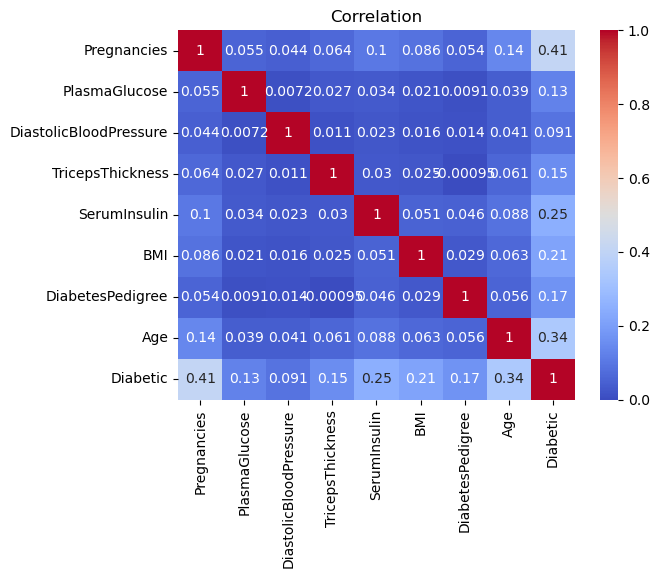

In [66]:
#build a heatmap for the same
correlation = df.corr()
print(correlation)
sb.heatmap(correlation,annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

               Age  Diabetic
Age       1.000000  0.342605
Diabetic  0.342605  1.000000


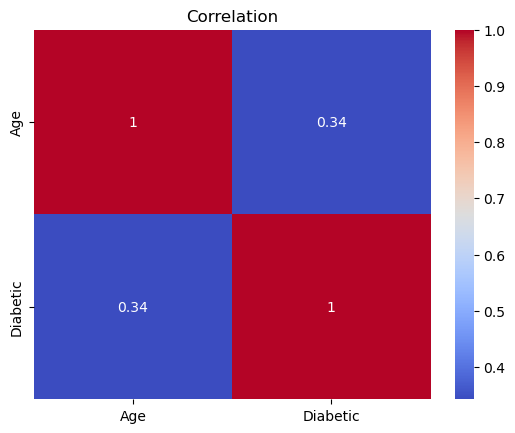

In [74]:
#build a heatmap for the same
correlation = df_normalized[['Age','Diabetic']].corr()
print(correlation)
sb.heatmap(correlation,annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

C:\Users\sajag177350\AppData\Local\Temp\1\ipykernel_13940\3380902999.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Age_Group', 'Diabetic']).size().unstack(fill_value=0)


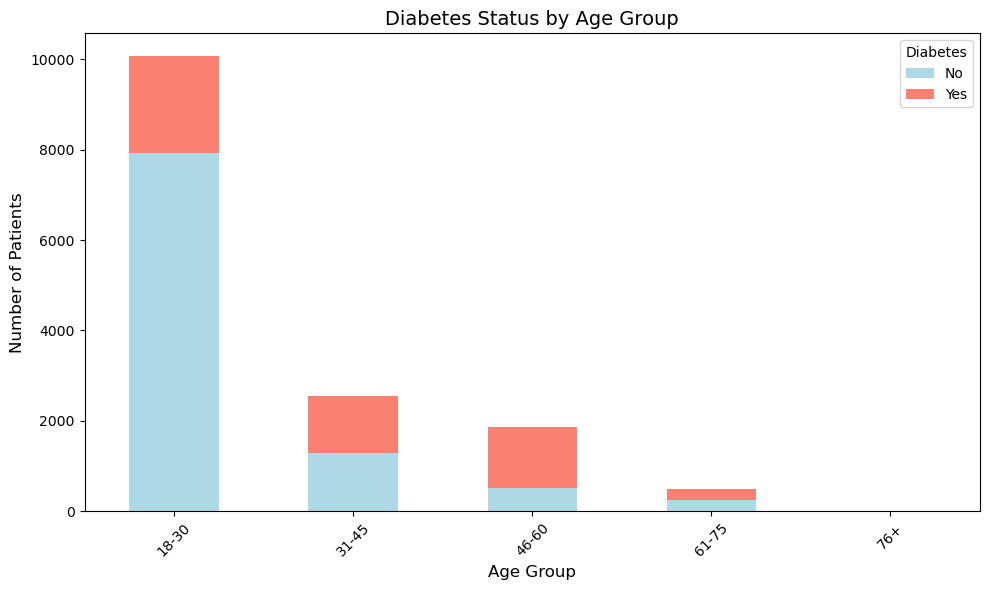

In [72]:
bins = [18, 30, 45, 60, 75, 100]  # Define the age group bins
labels = ['18-30', '31-45', '46-60', '61-75', '76+']  # Labels for the age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of Diabetics (Yes) and Non-Diabetics (No) in each age group
age_group_counts = df.groupby(['Age_Group', 'Diabetic']).size().unstack(fill_value=0)

# Plot the results
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])

# Set plot labels and title
plt.title('Diabetes Status by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Display the plot
plt.tight_layout()
plt.show()

In [77]:
df_normalized

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000,0.0
1,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714,0.0
2,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714,0.0
3,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857,1.0
4,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857,0.0
...,...,...,...,...,...,...,...,...,...
14995,0.714286,0.141892,0.387097,0.453488,0.207643,0.404713,0.031608,0.357143,1.0
14996,0.142857,0.195946,0.451613,0.232558,0.196178,0.315380,0.352683,0.303571,1.0
14997,0.000000,0.331081,0.698925,0.418605,0.054777,0.012956,0.156959,0.053571,0.0
14998,0.000000,0.594595,0.795699,0.127907,0.187261,0.042056,0.100836,0.035714,0.0


In [88]:
df2 = df.groupby(['Age_Group'])

C:\Users\sajag177350\AppData\Local\Temp\1\ipykernel_13940\3402247037.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['Age_Group'])


In [92]:
diabetic_bmi = df[df['Diabetic'] == 1]['BMI']
nondiabetic_bmi = df[df['Diabetic'] == 0]['BMI']
t_statistic, p_value = stats.ttest_ind(diabetic_bmi, nondiabetic_bmi, nan_policy='omit')

In [93]:
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -390.80395641719724, P-Value: 7.504788727506502e-150


In [98]:
df['Age_Group'].unique()

['18-30', '31-45', '46-60', '76+', '61-75']
Categories (5, object): ['18-30' < '31-45' < '46-60' < '61-75' < '76+']

In [99]:
PlasmaGlucose_1830 = df[df['Age_Group'] == '18-30']['PlasmaGlucose']
PlasmaGlucose_3145 = df[df['Age_Group'] == '31-45']['PlasmaGlucose']
PlasmaGlucose_4660 = df[df['Age_Group'] == '46-60']['PlasmaGlucose']
PlasmaGlucose_6175 = df[df['Age_Group'] == '76+']['PlasmaGlucose']
PlasmaGlucose_76 = df[df['Age_Group'] == '61-75']['PlasmaGlucose']
f_stat, p_value = stats.f_oneway(PlasmaGlucose_1830, PlasmaGlucose_3145, PlasmaGlucose_4660,PlasmaGlucose_6175,PlasmaGlucose_76)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 6.834595732792042, P-Value: 1.7164045556533447e-05


In [111]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Pregnancies'], df['Diabetic'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-Value: {p_value}")

P-Value: 1.7164045556533447e-05


In [112]:
np.random.seed(42)
age = np.random.randint(20, 60, 100)
income = np.random.randint(30000, 120000, 100)
spending_score = np.random.randint(1, 100, 100)

# Regression Analysis
X = df_normalized[["Age", "DiabetesPedigree", "BMI", "SerumInsulin", "TricepsThickness", "DiastolicBloodPressure", "PlasmaGlucose",  "Pregnancies" ]]
y = df_normalized["Diabetic"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Diabetic   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     988.7
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:01:41   Log-Likelihood:                -6825.6
No. Observations:               15000   AIC:                         1.367e+04
Df Residuals:                   14991   BIC:                         1.374e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0